In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

from tqdm import trange
import torch
import matplotlib.pyplot as plt

from models.cnn import ConvMLP
from data import get_dataloaders
from train_utils import train_epoch, evaluate

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 10
LR = 0.1

In [4]:
train_loader, test_loader = get_dataloaders()

results = {}

for use_bn in [False, True]:
    name = "BN" if use_bn else "NoBN"
    model = ConvMLP(in_channels=3, input_size=32, hidden_dims=(512, 256, 128), use_bn=use_bn).to(DEVICE)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    results[name] = {
        "loss": [],
        "grad_norm": [],
        "train_acc": [],
        "test_acc": []
    }

    for epoch in trange(EPOCHS, desc=f"Epochs ({name})"):
        loss, gnorm = train_epoch(model, train_loader, optimizer, DEVICE)
        train_acc = evaluate(model, train_loader, DEVICE)
        test_acc = evaluate(model, test_loader, DEVICE)

        results[name]["loss"].append(loss)
        results[name]["grad_norm"].append(gnorm)
        results[name]["train_acc"].append(train_acc)
        results[name]["test_acc"].append(test_acc)

Epochs (BN): 100%|██████████| 10/10 [02:43<00:00, 16.32s/it]


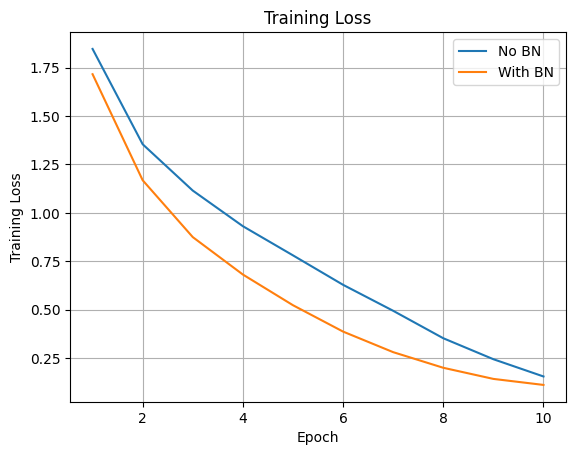

In [5]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, results["NoBN"]["loss"], label="No BN")
plt.plot(epochs, results["BN"]["loss"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
plt.show()

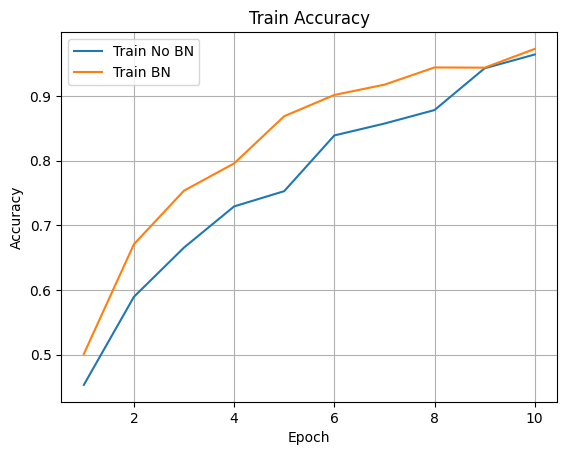

In [6]:
plt.plot(epochs, results["NoBN"]["train_acc"], label="Train No BN")
plt.plot(epochs, results["BN"]["train_acc"], label="Train BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train Accuracy")
plt.legend()
plt.grid()
plt.show()

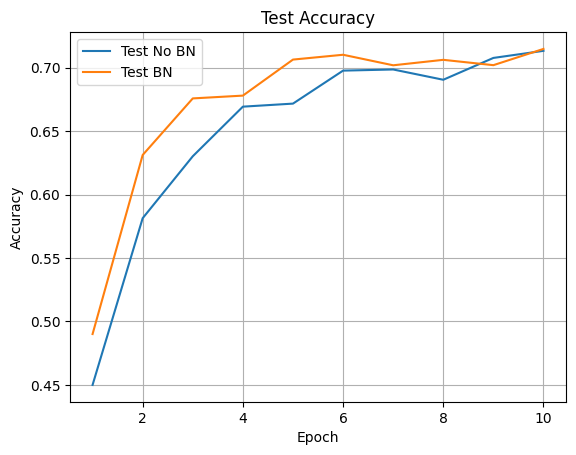

In [7]:
plt.plot(epochs, results["NoBN"]["test_acc"], label="Test No BN")
plt.plot(epochs, results["BN"]["test_acc"], label="Test BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.grid()
plt.show()

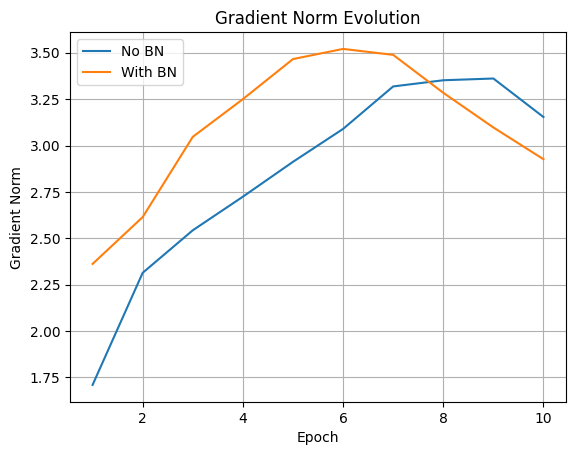

In [8]:
plt.plot(epochs, results["NoBN"]["grad_norm"], label="No BN")
plt.plot(epochs, results["BN"]["grad_norm"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution")
plt.legend()
plt.grid()
plt.show()